In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import copy


---
# VIDEO: Evaluating and improving covariance quality
---


In [4]:
# mat file containing EEG, leadfield and channel locations
matfile = sio.loadmat('sampleEEGdata')
EEG = matfile['EEG'][0,0]
EEG['times'] = EEG['times'][0]

In [17]:
## compute covariances and distances

# compute average of single-trial covariances
covave = np.zeros( (int(EEG['nbchan']),int(EEG['nbchan'])) )
for triali in range(int(EEG['trials'])):
    covave += np.cov( EEG['data'][:,:,triali] )

# divide by number of trials
covave = covave / triali


# now loop through trials and compute the distance to the average
covdist = np.zeros(int(EEG['trials']))

for triali in range(int(EEG['trials'])):
    thistrialcov = np.cov( EEG['data'][:,:,triali] )
    covdist[triali] = np.sqrt( np.dot( thistrialcov.flatten(),covave.flatten()) )

# convert to z
covdistz = (covdist-np.mean(covdist)) / np.std(covdist)


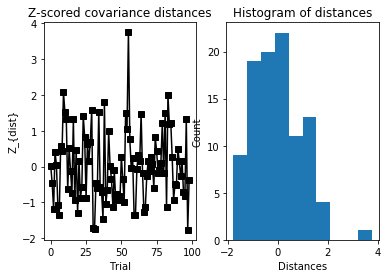

In [20]:
## visual inspection of covariance distances to average

# show the covariance distances
plt.subplot(121)
plt.plot(covdistz,'ks-')
plt.xlabel('Trial')
plt.ylabel('Z_{dist}')
plt.title('Z-scored covariance distances')


# histogram of distances
plt.subplot(122)
plt.hist(covdistz,10)
plt.xlabel('Distances')
plt.ylabel('Count')
plt.title('Histogram of distances')
plt.show()

In [27]:
## pick a threshold and reject trials

# threshold
thresh = 2.3  # corresponds to p~.01

# identify trials that exceed the threshold
toofar = covdistz>thresh

# remove those trials from the data
data2 = copy.deepcopy( EEG['data'] )
data2 = data2[:,:,~toofar]


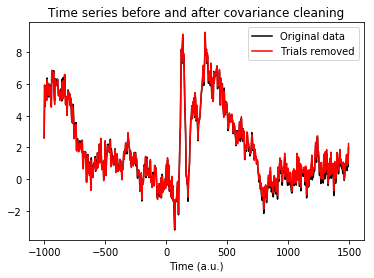

In [28]:
## show some data before and after rejection

# plot time courses
plt.plot(EEG['times'],np.mean(EEG['data'][30,:,:],axis=1),'k',label='Original data')
plt.plot(EEG['times'],np.mean(data2[30,:,:],axis=1),'r',label='Trials removed')
plt.xlabel('Time (a.u.)')
plt.legend()
plt.title('Time series before and after covariance cleaning')
plt.show()